# Blockchain Research - CryptoCompare

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import missingno as msno
from sklearn.preprocessing import StandardScaler
import random
random.seed(3)
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import datetime
from scipy import stats

## Importing Data

In [2]:
#load in data
sheets =[]

#append each sheet to sheets
for i in range(12):
    sheets.append(pd.read_excel("database_v5.xlsx",sheet_name=i))
    
#get cryptocompare database
df = sheets[2]
df.head()

,Column1,Id,Url,ImageUrl,ContentCreatedOn,Name,Symbol,CoinName,FullName,Description,...,AssetLaunchDate,MaxSupply,MktCapPenalty,PlatformType,BuiltOn,SmartContractAddress,DecimalPoints,Difficulty,IsUsedInDefi,IsUsedInNft
0,42,4321,/coins/42/overview,/media/35650717/42.jpg,1427211129,42,42,42 Coin,42 Coin (42),Everything about 42 coin is 42 - apart from th...,...,0000-00-00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300,749869,/coins/300/overview,/media/27010595/300.png,1517935016,300,300,300 token,300 token (300),300 token is an ERC20 token. This Token was cr...,...,2017-07-01 00:00:00,300.0,0.0,token,ETH,0xaec98a708810414878c3bcdf46aad31ded4a4557,18.0,NaN,NaN,NaN
2,365,33639,/coins/365/overview,/media/352070/365.png,1480032918,365,365,365Coin,365Coin (365),365Coin is a Proof of Work and Proof of Stake ...,...,0000-00-00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,404,21227,/coins/404/overview,/media/35650851/404-300x300.jpg,1466100361,404,404,404Coin,404Coin (404),404 is a PoW/PoS hybrid cryptocurrency that al...,...,0000-00-00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,433,926547,/coins/433/overview,/media/34836095/433.png,1541597321,433,433,433 Token,433 Token (433),433 Token is a decentralised soccer platform t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346 entries, 0 to 6345
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Column1               6346 non-null   object 
 1   Id                    6346 non-null   int64  
 2   Url                   6346 non-null   object 
 3   ImageUrl              6345 non-null   object 
 4   ContentCreatedOn      6346 non-null   int64  
 5   Name                  6346 non-null   object 
 6   Symbol                6346 non-null   object 
 7   CoinName              6346 non-null   object 
 8   FullName              6346 non-null   object 
 9   Description           6339 non-null   object 
 10  AssetTokenStatus      1625 non-null   object 
 11  Algorithm             1640 non-null   object 
 12  ProofType             1790 non-null   object 
 13  SortOrder             6346 non-null   int64  
 14  Sponsored             6346 non-null   bool   
 15  Taxonomy             

## Cleaning

### Taxonomy

In [4]:
def parseAccess(row):
    #get value 
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['Access']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseFCA(row):
    #get value 
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['FCA']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseFINMA(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['FINMA']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseIndustry(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['Industry']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseCollateralizedAsset(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['CollateralizedAsset']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseCollateralizedAssetType(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['CollateralizedAssetType']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val
    
def parseCollateralType(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['CollateralType']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val

def parseCollateralInfo(row):
    #get value
    dic=json.loads(row['Taxonomy'].replace("'","\""))
    val = dic['CollateralInfo']
    
    #if no value present, set as nan
    if val=='':
        return np.nan
    else:
        return val

#get new columns
df['Access'] = df.apply(lambda x: parseAccess(x),axis=1)
df['FCA'] = df.apply(lambda x: parseFCA(x),axis=1)
df['FINMA'] = df.apply(lambda x: parseFINMA(x),axis=1)
df['Industry'] = df.apply(lambda x: parseIndustry(x),axis=1)
df['CollateralizedAsset'] = df.apply(lambda x: parseCollateralizedAsset(x),axis=1)
df['CollateralizedAssetType'] = df.apply(lambda x: parseCollateralizedAssetType(x),axis=1)
df['CollateralType'] = df.apply(lambda x: parseCollateralType(x),axis=1)
df['CollateralInfo'] = df.apply(lambda x: parseCollateralInfo(x),axis=1)

df['FINMA'].value_counts()

Utility            1277
Utility,Asset       131
Payment,Utility      70
Payment              40
Payment,Asset         9
Asset                 9
Name: FINMA, dtype: int64

### Rating

In [5]:
def parseRating(row):
    #get rating
    dic=json.loads(row['Rating'].replace("'","\""))
    rating = dic['Weiss']['Rating']
    
    #if no value present, set as nan
    if rating=='':
        return np.nan
    else:
        return rating
    
def parseTechnologyAdoptionRating(row):
    #get rating
    dic=json.loads(row['Rating'].replace("'","\""))
    rating = dic['Weiss']['TechnologyAdoptionRating']
    
    #if no value present, set as nan
    if rating=='':
        return np.nan
    else:
        return rating
    
def parseMarketPerformanceRating(row):
    #get rating
    dic=json.loads(row['Rating'].replace("'","\""))
    rating = dic['Weiss']['MarketPerformanceRating']
    
    #if no value present, set as nan
    if rating=='':
        return np.nan
    else:
        return rating
    
#get new columns
df['OverallRating'] = df.apply(lambda x: parseRating(x),axis=1)
df['TechnologyAdoptionRating'] = df.apply(lambda x: parseTechnologyAdoptionRating(x),axis=1)
df['MarketPerformanceRating'] = df.apply(lambda x: parseMarketPerformanceRating(x),axis=1)

df['OverallRating'].value_counts()

D-    22
D+    17
C     16
C-    16
C+    12
D     11
E+    11
E-    10
E     10
B-     5
B+     2
Name: OverallRating, dtype: int64

### AssetLaunchDate

In [6]:
#remove invalid values
df['AssetLaunchDate'] = df['AssetLaunchDate'].replace('0000-00-00',np.nan)

#remove row with "ETH" as date
df.iloc[5354,23]=np.nan

#convert to datetime
df['AssetLaunchDate'] = pd.to_datetime(df['AssetLaunchDate'])

## Analysis

### Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346 entries, 0 to 6345
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Column1                   6346 non-null   object        
 1   Id                        6346 non-null   int64         
 2   Url                       6346 non-null   object        
 3   ImageUrl                  6345 non-null   object        
 4   ContentCreatedOn          6346 non-null   int64         
 5   Name                      6346 non-null   object        
 6   Symbol                    6346 non-null   object        
 7   CoinName                  6346 non-null   object        
 8   FullName                  6346 non-null   object        
 9   Description               6339 non-null   object        
 10  AssetTokenStatus          1625 non-null   object        
 11  Algorithm                 1640 non-null   object        
 12  ProofType           

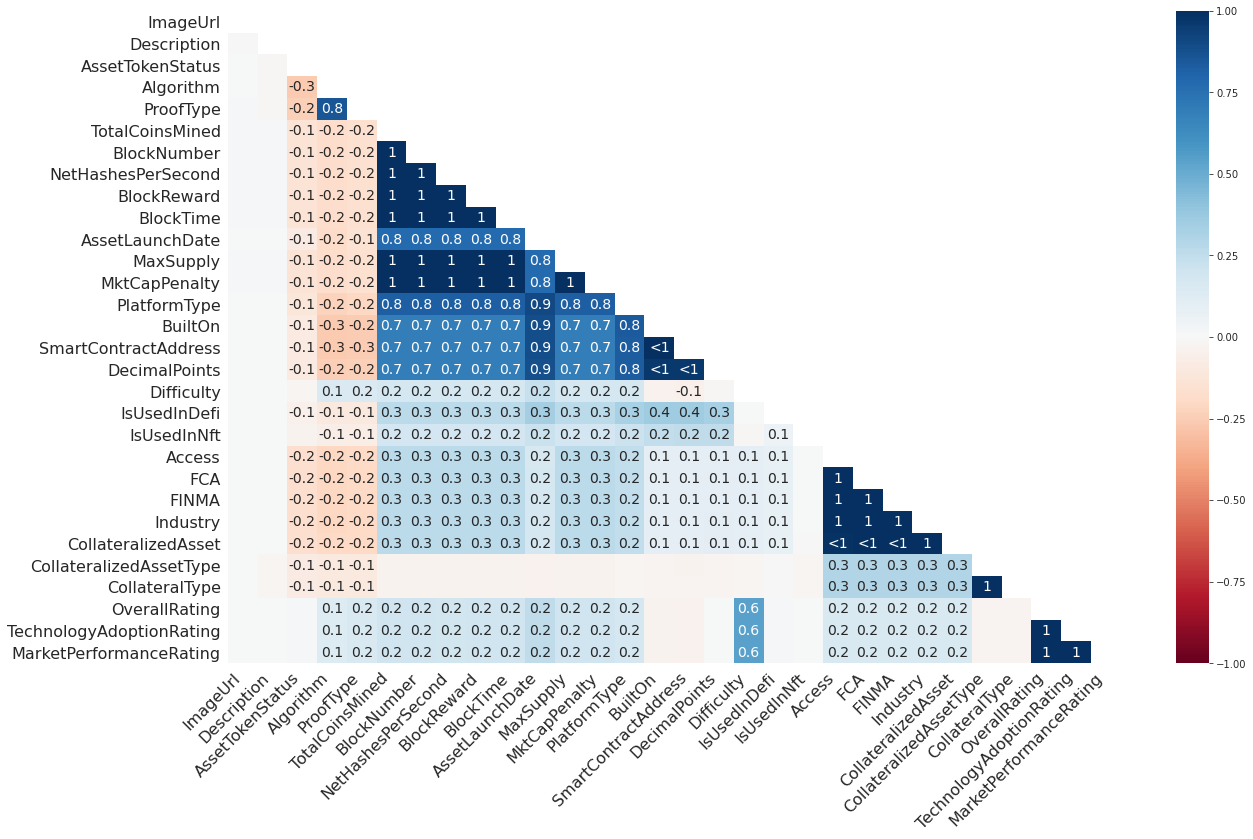

In [8]:
#heatmap of nullity correlations
msno.heatmap(df)
plt.show()

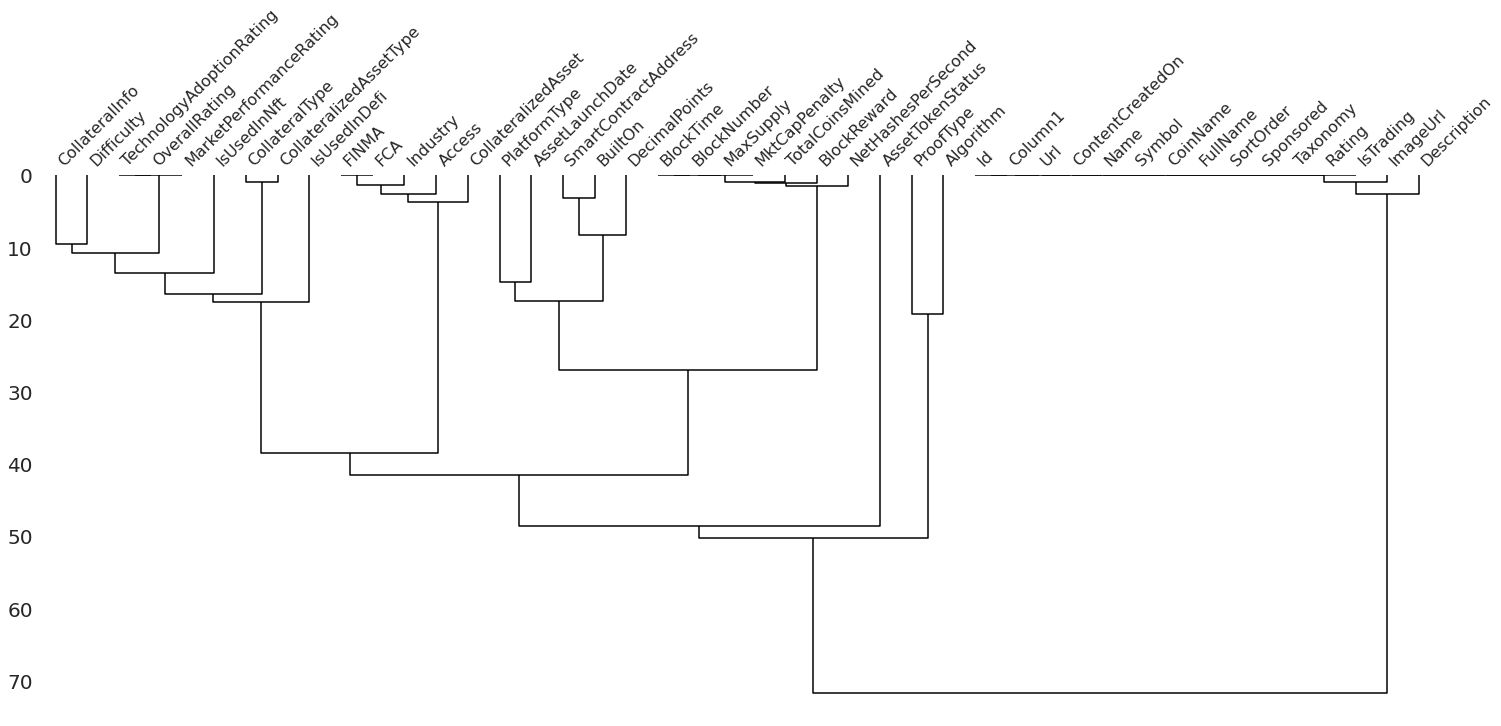

In [9]:
#dendogram based on null features
msno.dendrogram(df)
plt.show()

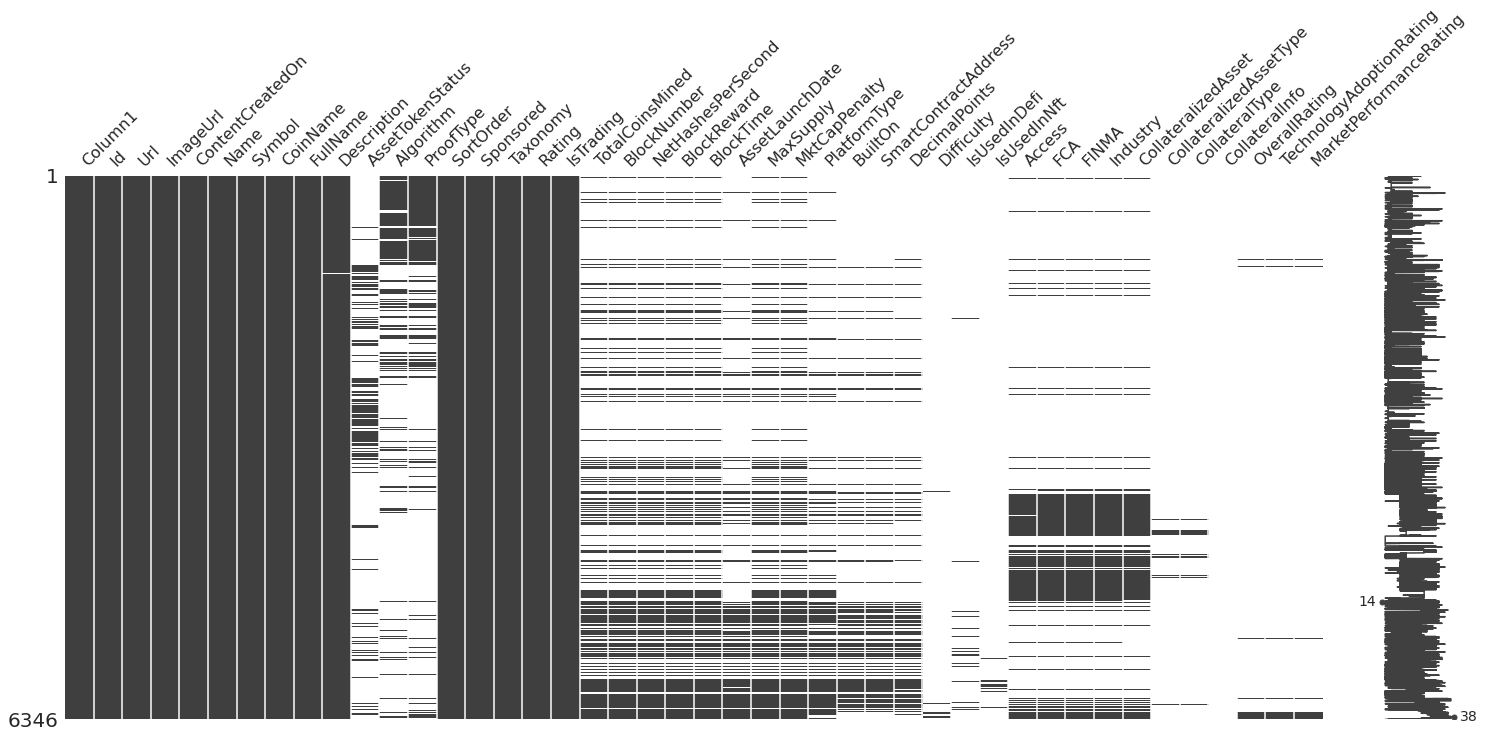

In [10]:
#show density of missing features
msno.matrix(df)
plt.show()

### PlatformType

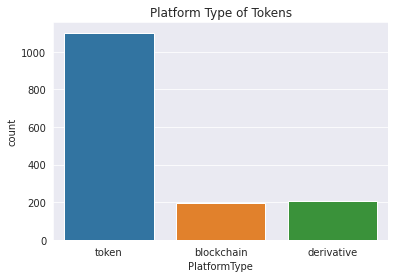

In [11]:
#plot PlatformType distribution
plt.title('Platform Type of Tokens')
sns.countplot(data=df, x='PlatformType')
plt.show()

In [12]:
#show examples of tokens
pd.set_option('display.max_colwidth', None)
df[df['PlatformType']=='token'][['FullName','Description']].sample(5)

,FullName,Description
5253,DefiSocial (DFSOCIAL),"DFSocial Team's mission is to develop a value-added token and community-centred product. DFSocial Gaming aims to bring together the services of decentralized finance protocols (staking and farming) and gaming. The long-term vision is a gaming platform with a mobile app, so holders can earn gaming rewards."
4479,Balancer (BAL),"An AMM, or Automated Market Maker is a general term that defines an algorithm for creating and managing liquidity. Instead of paying fees to portfolio managers to rebalance the users' portfolio, they collect fees from traders, who rebalance their portfolio. Users can earn returns by providing liquidity or as a trader swap between any assets in the global liquidity pool."
5842,EDDASwap (EDDA),"EDDASwap is an ecosystem of DeFi + NFT applications with a DEX supporting ERC-20, Binance Smart Chain and Polkadot.EDDA is the native token of the EDDASwap ecosystem, deriving its name from an ancient collection of mythological Norse poems. EDDA Token holders will be the primary beneficiaries of the continued usage and growth of EDDASwap, and will ultimately govern the ecosystem in a decentralized manner."
5077,Trump Loses Token (TRUMPLOSE),"TRUMPWIN and TRUMPLOSE are ERC20 tokens that will be redeemable on FTX for either 1 or 0 USD based on if TRUMP wins the election*. After the election, FTX will add a button to this page to redeem all your tokens with no fees.TRUMPLOSE is redeemable for $1.00 if Trump loses the 2020 US Presidential election* and $0.00 otherwise."
5033,Molecular Future (MOF),"Molecular Future is a decentralized digital asset management ecosystem that is based and founded by multiple Hong Kong companies (China Fortune, HBCC, XBTING Fund, HCASH Foundation, and Collistar Capital). It's a platform designed to provide its user's related Blockchain-based products, guidance through the Blockchain industry, agency trading software, and media information.The issued token by Molecular Future is MOF an ERC 20 Ethereum-based token. MOF is a medium of exchange in the Molecular Future ecosystem, acts as a reward payment of the different campaigns running and completed transactions with MOF token."


In [13]:
#show examples of blockchains
pd.set_option('display.max_colwidth', None)
df[df['PlatformType']=='blockchain'][['FullName','Description']].sample(5)

,FullName,Description
5192,XDNA (XDNA),"XDNA is a PoW/PoS cryptocurrency that uses the Keccak algorithm. XDNA features a second layer network of masternodes that process private and near-instant transactions. It also has another feature named BitGun that aims to provide dynamic changed block rewards. In addition, a dual mining mode in Claymore's miner option is available to the user. XDNA foundation is associated with XDNA and it is a non-commercial charity fund that aims to make use of modern technologies to spread their donations around the world.3 levels of masternodes:XDNA Light Node (XDNA-LN) required for masternode 5000 coinsXDNA Medium Node (XDNA-MN) required for masternode 10000 coinsXDNA Full Node (XDNA-FN) required for masternode 50000 coins XDNA website and social media are down."
5504,Kadena (KDA),"KDA is a digital currency that is used to pay for compute on the Kadena public chain. Similar to ETH on Ethereum, KDA on Kadena is the manner by which miners are compensated for mining blocks on the network and is the transaction fee that users pay in order to have their transactions included in a block.The Kadena network is designed to unite public applications, private blockchains, and other interoperable chains in one place, driving traffic to the high-bandwidth computer at the heart of the Kadena public chain.Kadena€™s smart contracts are written in Pact, an open-source, formally-verifiable, human-readable, and Turing-incomplete language. Pact is designed for ease of use and adoption by developers and non-technical professionals alike. Gas is paid to the network for the execution of Pact smart contracts on the Kadena blockchain.The max supply is fixed at 1 billion tokens to be mined over 120 years."
3096,Bithereum (BTH),"Bithereum aims to fuse the visions of both Bitcoin and Ethereum, ultimately revolutionizing mining, improving scalability, and increasing network consensus. Furthermore, the Bithereum Network rewards every participant in the network. The ultimate vision of the network is fully inclusive and incentivized: from miners to full nodes, to holders who wish to stake, every member of the community has the ability to earn incentives and be responsible for keeping the network alive and secure."
985,XTRABYTES (XBY),"XTRABYTES„¢ goes beyond being a currency. It's a next-gen blockchain platform that allows DApps to be programmed in any language, utilizing a new and ecological consensus algorithm. Standard blockchain environments contain many centralization vulnerabilities, such as self-contained development, consensus methods, and coin monopolization. The XTRABYTES„¢ platform seeks to rectify these limitations by creating a truly decentralized crypto currency and applications platform. Accordingly, XTRABYTES„¢ presents a next - generation blockchain solution capable of providing a diverse set of capabilities."
6336,Bitcoin Cash (BCH),"Bitcoin Cash (BCH) is a hard forked version of the original Bitcoin. It is similar to bitcoin with regards to its protocol; Proof of Work SHA-256 hashing, 21,000,000 supply, same block times and reward system. However two main differences are the the blocksize limits, as of August 2017 Bitcoin has a 1MB blocksize limit whereas BCH proposes 8MB blocks. Bitcoin Cash is a proposal from the viaBTC mining pool and the Bitmain mining group to carry out a UAHF (User Activated Hard Fork) on August 1st 12:20 pm UTC. They rejected the agreed consensus (aka BIP-91 or SegWit2x) and have decided to fork the original Bitcoin blockchain and create this new version called €œBitcoin Cash€. Bitcoin Cash can be claimed by BTC owners who have their private keys or store their Bitcoins on a service that will split BCH for the customer. On November 15, 2020, Bitcoin Cash experienced a scheduled upgrade. Bitcoin Cash developers from various full node projects changed the Difficulty Adjustment Algorithm (DAA) to a new DAA called €˜aserti3-2d€˜ (or €˜ASERT€™ for short).Blockchain data provided by: Blockcha

In [14]:
#show examples of derivatives
pd.set_option('display.max_colwidth', None)
df[df['PlatformType']=='derivative'][['FullName','Description']].sample(5)

,FullName,Description
4856,1X Short Dragon Index Token (DRGNHEDGE),1X Short Dragon Index Token (DRGNHEDGE) is an ERC20 token which seeks a return that corresponds to -1 times the daily return of Dragon Index.
4326,3X Short PAX Gold Token (PAXGBEAR),3X Short PAX Gold Token (PAXGBEAR) is an ERC20 token which seeks a return that corresponds to -3 times the daily return of PAX Gold.
4861,3X Short DMM Governance Token (DMGBEAR),3X Short DMM Governance Token (DMGBEAR) is an ERC20 token which seeks a return that corresponds to -3 times the daily return of DMM Governance.
4522,ETHUP (ETHUP),Binance Leveraged Tokens are tradable assets (off-chain tokens) in the Binance spot market that give users leveraged exposure to the underlying asset. Each leveraged token represents a basket of perpetual contract positions. The price of the tokens tracks the change in the notional amount of the perpetual contract positions in the basket and changes in the multiples of leverage level.
4028,3X Long Altcoin Index Token (ALTBULL),3X Long Altcoin Index Token (ALTBULL) is an ERC20 token which seeks a return that corresponds to 3 times the daily return of Altcoin Index.


In [15]:
pd.reset_option("^display")

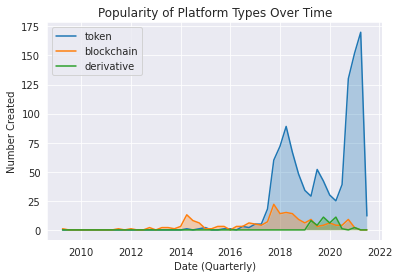

In [16]:
df_plot=df.copy()

#group by PlatformType, and aggregate AssetLaunchDate by quarter
df_new = (df_plot.set_index('AssetLaunchDate')
            .groupby('PlatformType')
            .resample('Q')
            .size()
            .unstack(0, fill_value=0))

#plot each PlatformType
levels=df_plot['PlatformType'].dropna().unique()
for level in levels:
    plt.plot(df_new.index, df_new[level])
    plt.fill_between(df_new.index,df_new[level], alpha=0.30)

#label chart
plt.legend(levels)
plt.title('Popularity of Platform Types Over Time')
plt.xlabel('Date (Quarterly)')
plt.ylabel('Number Created')

plt.show()

### BuiltOn

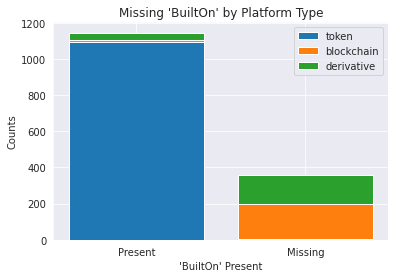

In [17]:
#plot tokens
df_t = df[df['PlatformType']=='token']
counts_t = df_t['BuiltOn'].isna().value_counts().sort_index(ascending=False)
plt.bar(counts_t.index, counts_t.values,label='token')

#plot blockchains
df_b = df[df['PlatformType']=='blockchain']
counts_b = df_b['BuiltOn'].isna().value_counts().sort_index(ascending=False)
plt.bar(counts_t.index, counts_b.values,bottom=counts_t.values,label='blockchain')

#plot derivatives
df_d = df[df['PlatformType']=='derivative']
counts_d = df_d['BuiltOn'].isna().value_counts().sort_index(ascending=False)
plt.bar(counts_t.index, counts_d.values,bottom=counts_b.values+counts_t.values,label='derivative')

#label chart
plt.legend()
plt.title('Missing \'BuiltOn\' by Platform Type')
plt.xlabel('\'BuiltOn\' Present')
plt.ylabel('Counts')
plt.xticks([0,1],['Present','Missing'])

plt.show()

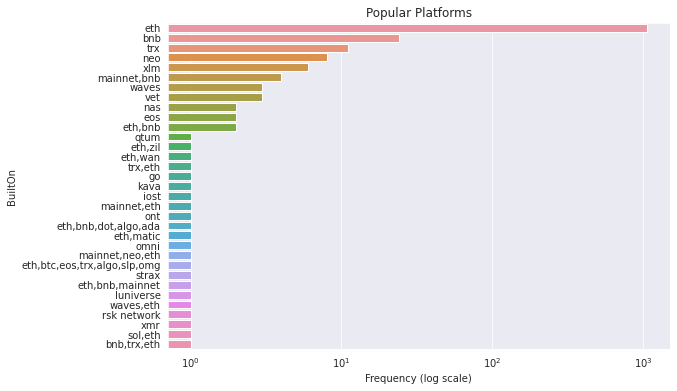

In [18]:
#plot frequencies of BuiltOn platforms
plt.figure(figsize=(9,6))
plt.title("Popular Platforms")
ax = sns.countplot(y=df['BuiltOn'].str.lower(),order=df['BuiltOn'].str.lower().value_counts().index)
ax.set_xscale('log')
plt.xlabel('Frequency (log scale)')
plt.show()

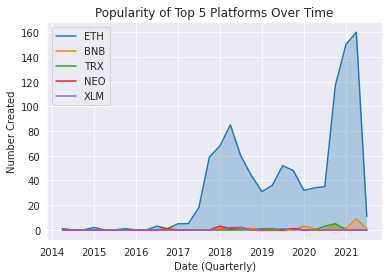

In [19]:
df_plot= df.dropna(subset=['AssetLaunchDate']).copy()

#group by BuiltOn, and aggregate AssetLaunchDate by quarter
df_new = (df_plot.set_index('AssetLaunchDate')
            .groupby('BuiltOn')
            .resample('Q')
            .size()
            .unstack(0, fill_value=0))

#plot each BuiltOn platform
levels=df_plot['BuiltOn'].value_counts()[:5].index
for level in levels:
    plt.plot(df_new.index, df_new[level])
    plt.fill_between(df_new.index,df_new[level], alpha=0.30)

#label chart
plt.legend(levels)
plt.title('Popularity of Top 5 Platforms Over Time')
plt.xlabel('Date (Quarterly)')
plt.ylabel('Number Created')
plt.show()

### Algorithm

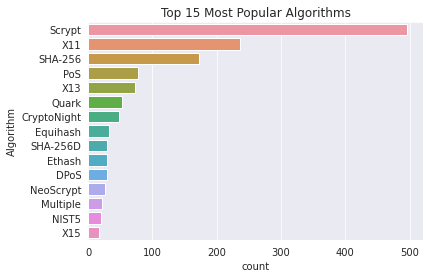

In [20]:
df_plot=df.copy()
df_plot.dropna(subset=['Algorithm'],inplace=True)
values = df_plot.groupby('Algorithm')['Algorithm'].agg('count')
svalues = values.sort_values(ascending=False)
sns.barplot(x=svalues[0:15].values,y=svalues[0:15].index)
plt.title('Top 15 Most Popular Algorithms')
plt.xlabel('count')
plt.show()

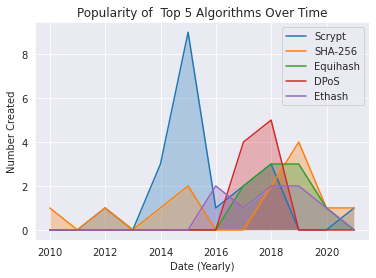

In [21]:
df_plot = df.dropna(subset=['AssetLaunchDate']).copy()

#group by Algorithm, and aggregate AssetLaunchDate by year
df_new = (df_plot.set_index('AssetLaunchDate')
            .groupby('Algorithm')
            .resample('Y')
            .size()
            .unstack(0, fill_value=0))

#plot each Algorithm
levels=df_plot['Algorithm'].value_counts()[0:5].index
for level in levels:
    plt.plot(df_new.index, df_new[level])
    plt.fill_between(df_new.index,df_new[level], alpha=0.30)

#label chart
plt.legend(levels)
plt.title('Popularity of  Top 5 Algorithms Over Time')
plt.xlabel('Date (Yearly)')
plt.ylabel('Number Created')

plt.show()

### IsTrading

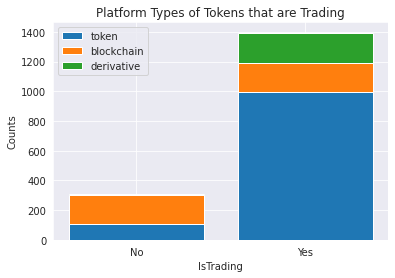

In [22]:
#plot tokens
df_t = df[df['PlatformType']=='token']
counts_t = df_t['IsTrading'].value_counts()
plt.bar(counts_t.index, counts_t.values,label='token')

#plot blockchains
df_b = df[df['PlatformType']=='blockchain']
counts_b = df_b['IsTrading'].value_counts()
plt.bar(counts_t.index, counts_b.values,bottom=counts_t.values,label='blockchain')

#plot derivatives
df_d = df[df['PlatformType']=='derivative']
counts_d = df_d['IsTrading'].value_counts()
plt.bar(counts_t.index, counts_d.values,bottom=counts_b.values+counts_t.values,label='derivative')

#label chart
plt.legend()
plt.title('Platform Types of Tokens that are Trading')
plt.xlabel('IsTrading')
plt.ylabel('Counts')
plt.xticks([0,1],['No','Yes'])

plt.show()

### AssetLaunchDate

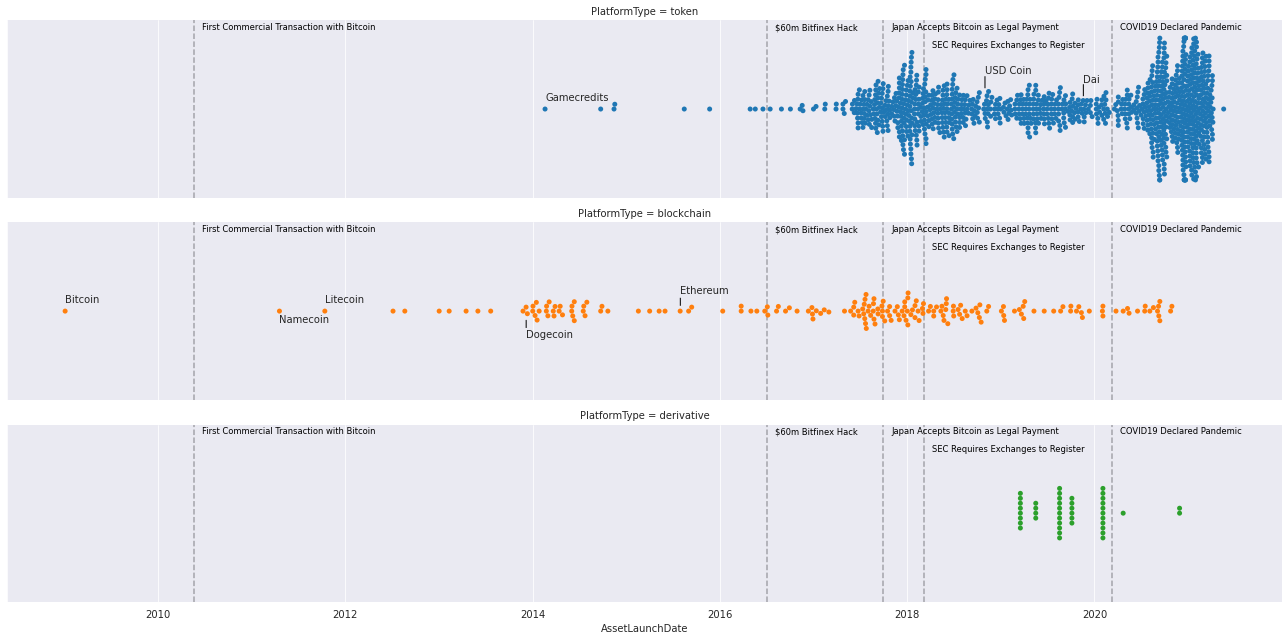

In [23]:
df_plot=df.dropna(subset=['AssetLaunchDate']).copy()

#plot facetgrid, with each plot belonging to different platform type
g=sns.FacetGrid(data=df_plot, row='PlatformType',hue='PlatformType',aspect=6)
g.map(sns.swarmplot, 'AssetLaunchDate',order=['token','blockchain','derivative'])


#plot important dates
for ax in g.axes.flat:
    ax.axvline(datetime.datetime(2020,3,11),linestyle='--',color='black',alpha=.3)
    ax.text(datetime.datetime(2020,4,11),-.45,'COVID19 Declared Pandemic',size='small',color='black')
    
    ax.axvline(datetime.datetime(2017,9,29),linestyle='--',color='black',alpha=.3)
    ax.text(datetime.datetime(2017,10,29),-.45,'Japan Accepts Bitcoin as Legal Payment',size='small',color='black')
    
    ax.axvline(datetime.datetime(2010,5,22),linestyle='--',color='black',alpha=.3)
    ax.text(datetime.datetime(2010,6,22),-.45,'First Commercial Transaction with Bitcoin',size='small',color='black')
    
    ax.axvline(datetime.datetime(2018,3,7),linestyle='--',color='black',alpha=.3)
    ax.text(datetime.datetime(2018,4,7),-.35,'SEC Requires Exchanges to Register',size='small',color='black')
    
    ax.axvline(datetime.datetime(2016,7,3),linestyle='--',color='black',alpha=.3)
    ax.text(datetime.datetime(2016,8,3),-.45,'$60m Bitfinex Hack',size='small',color='black')

#plot blockchain names
g.axes.flat[1].text(datetime.datetime(2009,1,3),-.05,'Bitcoin')
g.axes.flat[1].text(datetime.datetime(2011,4,19),.06,'Namecoin')
g.axes.flat[1].text(datetime.datetime(2011,10,13),-.05,'Litecoin')
g.axes.flat[1].text(datetime.datetime(2015,7,30),-.1,'Ethereum')
g.axes.flat[1].arrow(datetime.datetime(2015,7,30),-.075, 0,0,width=.01,color='black',lw=.5)
g.axes.flat[1].text(datetime.datetime(2013,12,6),.15,'Dogecoin')
g.axes.flat[1].arrow(datetime.datetime(2013,12,6),.05, 0,0,width=.01,color='black',lw=.5)

#plot token names
g.axes.flat[0].text(datetime.datetime(2018,10,31),-.2,'USD Coin')
g.axes.flat[0].arrow(datetime.datetime(2018,10,31),-.185, 0,0,width=.015,color='black',lw=.5)
g.axes.flat[0].text(datetime.datetime(2019,11,18),-.15,'Dai')
g.axes.flat[0].arrow(datetime.datetime(2019,11,18),-.14, 0,0,width=.015,color='black',lw=.5)
g.axes.flat[0].text(datetime.datetime(2014,2,18),-.05,'Gamecredits')

plt.show()

### TotalCoinsMined

In [24]:
df['TotalCoinsMined'].describe()

count    1.996000e+03
mean     4.626910e+14
std      1.756269e+16
min     -5.325063e+05
25%      0.000000e+00
50%      3.000000e+07
75%      9.021174e+08
max      7.770000e+17
Name: TotalCoinsMined, dtype: float64

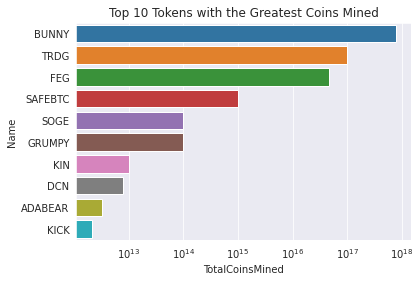

In [25]:
df_plot = df.copy()

#rank by TotalCoinsMined
df_plot.dropna(subset=['TotalCoinsMined'],inplace=True)
df_plot.sort_values('TotalCoinsMined',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='TotalCoinsMined')
ax.set_xscale('log')

plt.title('Top 10 Tokens with the Greatest Coins Mined')
plt.show()

### BlockReward

In [26]:
df['BlockReward'].describe()

count    1.996000e+03
mean     6.357345e+06
std      2.840232e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.268919e+10
Name: BlockReward, dtype: float64

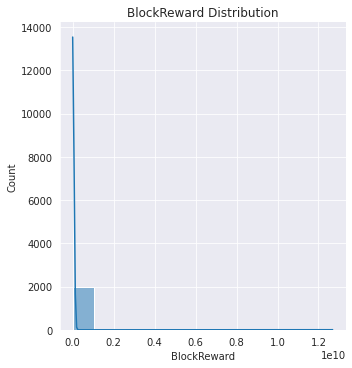

In [27]:
#plot BlockReward distribution
sns.displot(data=df,x='BlockReward',kde=True)
plt.title('BlockReward Distribution')
plt.show()

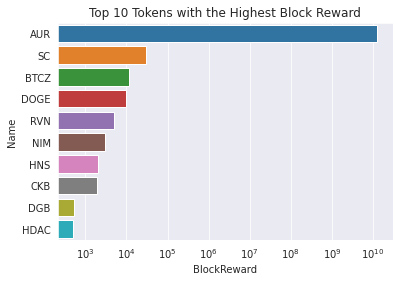

In [28]:
df_plot = df.copy()

#rank by BlockReward
df_plot.dropna(subset=['BlockReward'],inplace=True)
df_plot.sort_values('BlockReward',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='BlockReward')
ax.set_xscale('log')
plt.title('Top 10 Tokens with the Highest Block Reward')

plt.show()

### NetHashesPerSecond

In [29]:
df['NetHashesPerSecond'].describe()

count    1.995000e+03
mean     1.679806e+17
std      4.898977e+18
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.864438e+20
Name: NetHashesPerSecond, dtype: float64

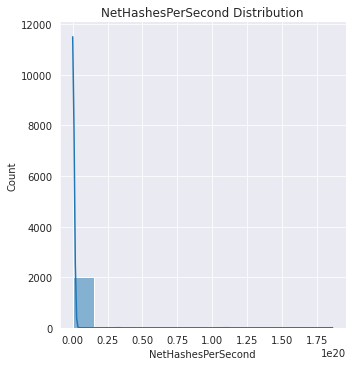

In [30]:
#plot NetHashesPerSecond distribution
sns.displot(data=df,x='NetHashesPerSecond',kde=True)
plt.title('NetHashesPerSecond Distribution')
plt.show()

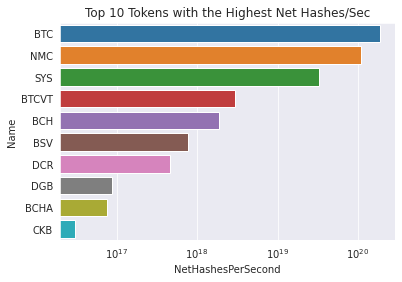

In [31]:
df_plot = df.copy()

#rank by NetHashesPerSecon
df_plot.dropna(subset=['NetHashesPerSecond'],inplace=True)
df_plot.sort_values('NetHashesPerSecond',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='NetHashesPerSecond')
ax.set_xscale('log')
plt.title('Top 10 Tokens with the Highest Net Hashes/Sec')

plt.show()

### BlockTime

In [32]:
df['BlockTime'].describe()

count    1997.000000
mean        4.172892
std        38.611422
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       646.000000
Name: BlockTime, dtype: float64

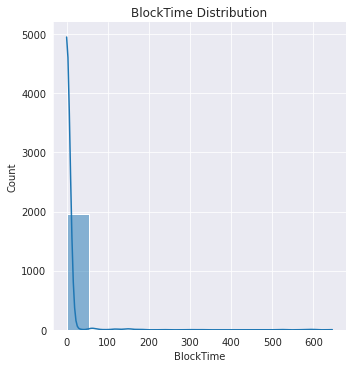

In [33]:
#plot NetHashesPerSecond distribution
sns.displot(data=df,x='BlockTime',kde=True)
plt.title('BlockTime Distribution')
plt.show()

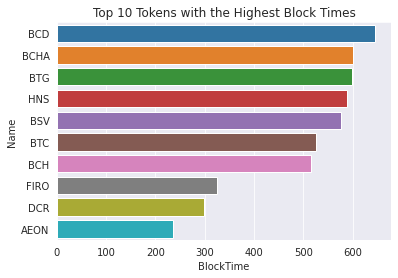

In [34]:
df_plot = df.copy()

#rank by BlockTime
df_plot.dropna(subset=['BlockTime'],inplace=True)
df_plot.sort_values('BlockTime',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='BlockTime')
plt.title('Top 10 Tokens with the Highest Block Times')

plt.show()

### BlockNumber

In [35]:
df['BlockNumber'].describe()

count    1.997000e+03
mean     9.091649e+05
std      6.979567e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.778383e+08
Name: BlockNumber, dtype: float64

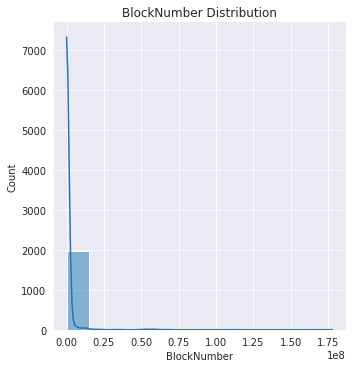

In [36]:
#plot NetHashesPerSecond distribution
sns.displot(data=df,x='BlockNumber',kde=True)
plt.title('BlockNumber Distribution')
plt.show()

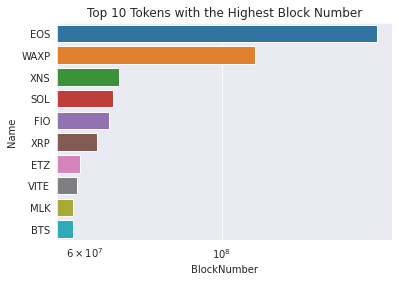

In [37]:
df_plot = df.copy()

#rank by BlockTime
df_plot.dropna(subset=['BlockNumber'],inplace=True)
df_plot.sort_values('BlockNumber',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='BlockNumber')
plt.title('Top 10 Tokens with the Highest Block Number')
ax.set_xscale('log')
plt.show()

### MaxSupply

In [38]:
df['MaxSupply'].describe()

count    1.997000e+03
mean     5.008589e+13
std      2.237747e+15
min     -1.000000e+00
25%     -1.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+17
Name: MaxSupply, dtype: float64

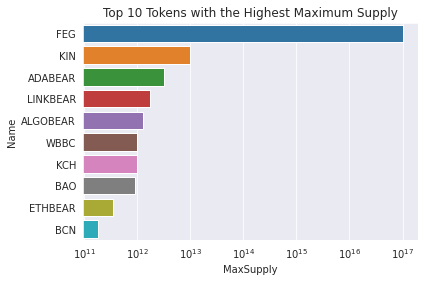

In [39]:
df_plot = df.copy()

#rank by BlockTime
df_plot.dropna(subset=['MaxSupply'],inplace=True)
df_plot.sort_values('MaxSupply',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='MaxSupply')
plt.title('Top 10 Tokens with the Highest Maximum Supply')
ax.set_xscale('log')
plt.show()

### MktCapPenalty

In [40]:
df['MktCapPenalty'].describe()

count    1997.000000
mean        2.603650
std        15.927572
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: MktCapPenalty, dtype: float64

In [41]:
df['MktCapPenalty'].value_counts()

0.00      1945
99.99       51
100.00       1
Name: MktCapPenalty, dtype: int64

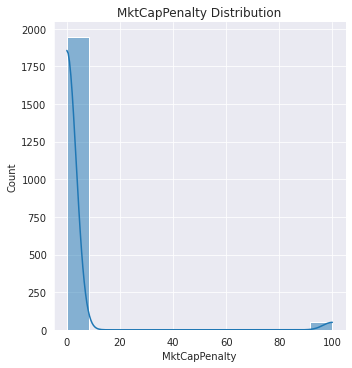

In [42]:
#plot NetHashesPerSecond distribution
sns.displot(data=df,x='MktCapPenalty',kde=True)
plt.title('MktCapPenalty Distribution')
plt.show()

### ContentCreatedOn

In [43]:
df['ContentCreatedOn'].describe()

count    6.346000e+03
mean     1.541898e+09
std      5.206995e+07
min      1.417635e+09
25%      1.509045e+09
50%      1.542710e+09
75%      1.592067e+09
max      1.617991e+09
Name: ContentCreatedOn, dtype: float64

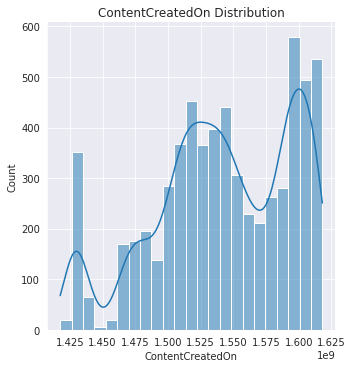

In [44]:
#plot NetHashesPerSecond distribution
sns.displot(data=df,x='ContentCreatedOn',kde=True)
plt.title('ContentCreatedOn Distribution')
plt.show()

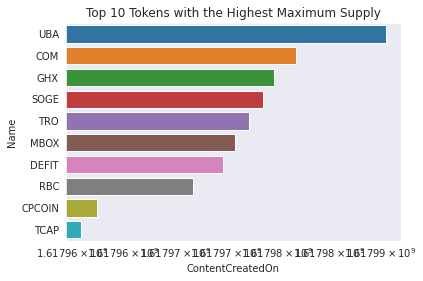

In [45]:
df_plot = df.copy()

#rank by BlockTime
df_plot.dropna(subset=['ContentCreatedOn'],inplace=True)
df_plot.sort_values('ContentCreatedOn',ascending=False,inplace=True)

#plot top 10
ax=sns.barplot(data=df_plot.head(10),y='Name',x='ContentCreatedOn')
plt.title('Top 10 Tokens with the Highest Maximum Supply')
ax.set_xscale('log')

plt.show()

### Numeric Correlation

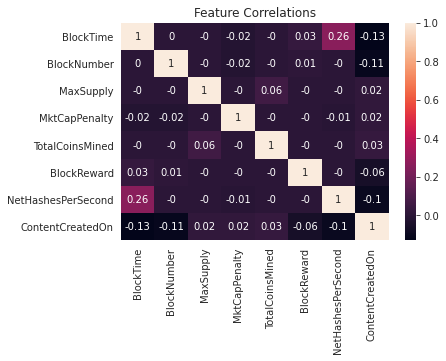

In [46]:
#select numeric features
numeric = ['BlockTime','BlockNumber','MaxSupply','MktCapPenalty','TotalCoinsMined','BlockReward','NetHashesPerSecond',
           'ContentCreatedOn']

#plot heatmap of numeric feature correlations
sns.heatmap(df[numeric].corr().round(2),annot=True)
plt.title('Feature Correlations')
plt.show()

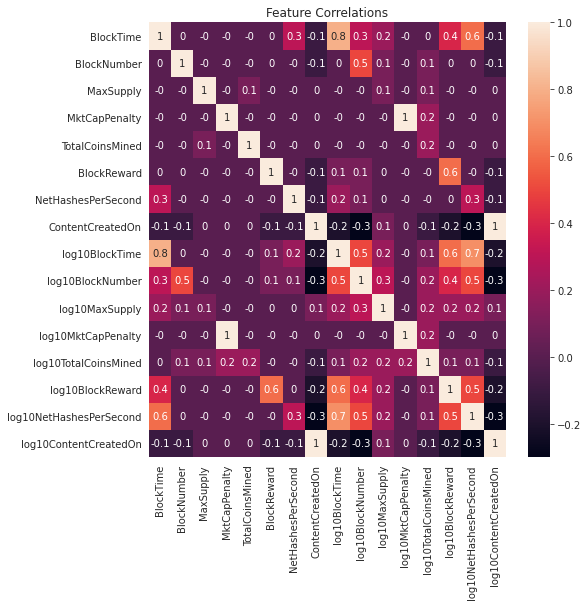

In [47]:
df_plot=df.copy()

#these features have negative values, so they must be adjusted
for feature in ['BlockTime','BlockNumber','MaxSupply','MktCapPenalty','TotalCoinsMined','BlockReward','NetHashesPerSecond']:
    df_plot['log10'+feature]=np.log10(df_plot[feature]+abs(df_plot[feature].min())+1)
    numeric.append('log10'+feature)

#this feature is all positive, so no adjustment needed
df_plot['log10ContentCreatedOn']=np.log(df_plot['ContentCreatedOn'])
numeric.append('log10ContentCreatedOn')
    
#plot heatmap of numeric correlations, this time with the logs of each feature
plt.figure(figsize=(8,8))
sns.heatmap(df_plot[numeric].corr().round(1),annot=True)
plt.title('Feature Correlations')
plt.show()

### BlockTime vs log10NetHashesPerSecond

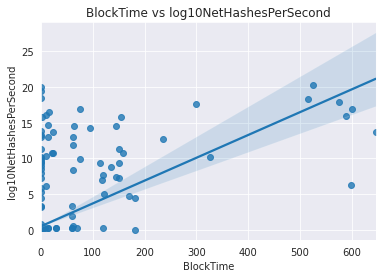

In [48]:
#plot BlockTime vs. log10NetHashesPerSecond (.6)
sns.regplot(data=df_plot, x='BlockTime',y='log10NetHashesPerSecond')
plt.title('BlockTime vs log10NetHashesPerSecond')
plt.show()

### BlockTime vs log10BlockReward

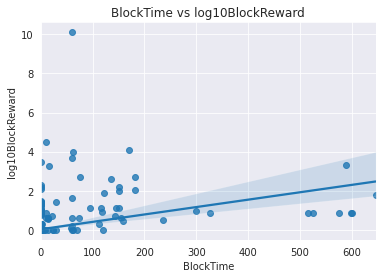

In [49]:
#plot BlockTime vs log10BlockReward (.38)
sns.regplot(data=df_plot, x='BlockTime',y='log10BlockReward')
plt.title('BlockTime vs log10BlockReward')
plt.show()

### log10NetHashesPerSecond vs log10BlockTime

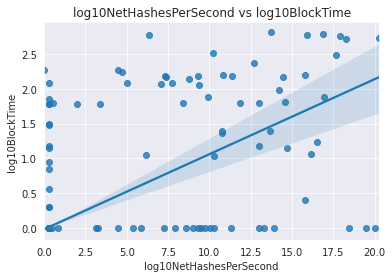

In [50]:
#plot log10NetHashesPerSecond vs log10BlockTime (.7)
sns.regplot(data=df_plot, x='log10NetHashesPerSecond',y='log10BlockTime')
plt.title('log10NetHashesPerSecond vs log10BlockTime')
plt.show()

### log10BlockTime vs log10BlockReward

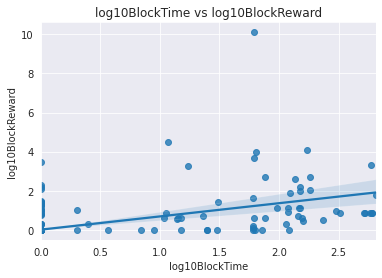

In [51]:
#plot log10BlockTime vs log10BlockReward(.4)
sns.regplot(data=df_plot, y='log10BlockReward',x='log10BlockTime')
plt.title('log10BlockTime vs log10BlockReward')
plt.show()

### log10BlockTime vs log10BlockNumber

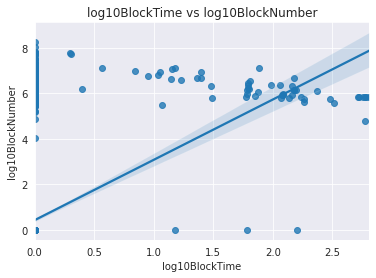

In [52]:
#plot log10BlockTime vs log10BlockNumber (.5)
sns.regplot(data=df_plot, y='log10BlockNumber',x='log10BlockTime')
plt.title('log10BlockTime vs log10BlockNumber')
plt.show()

### log10BlockNumber vs log10NetHashsesPerSecond

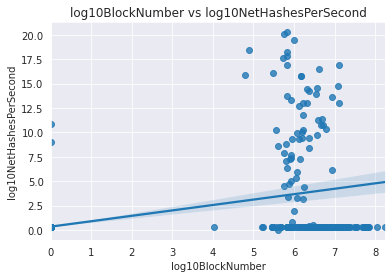

In [53]:
#plot log10BlockNumber vs log10NetHashesPerSecond (.5)
sns.regplot(data=df_plot, x='log10BlockNumber',y='log10NetHashesPerSecond')
plt.title('log10BlockNumber vs log10NetHashesPerSecond')
plt.show()

### log10BlockNumber vs log10BlockReward

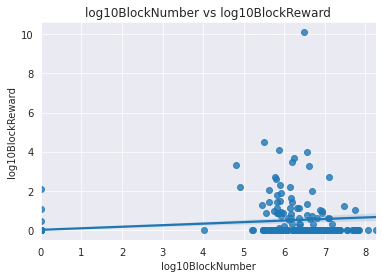

In [54]:
#plot log10BlockNumber vs log10BlockReward (.4)
sns.regplot(data=df_plot, x='log10BlockNumber',y='log10BlockReward')
plt.title('log10BlockNumber vs log10BlockReward')
plt.show()

### log10BlockReward vs log10NetHashesPerSecond

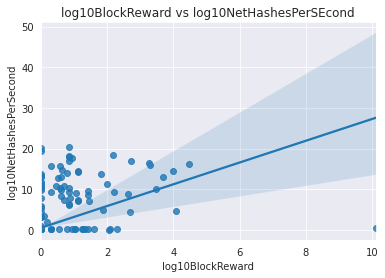

In [55]:
#plot log10BlockReward vs log10NetHashesPerSecond (.5)
sns.regplot(data=df_plot, x='log10BlockReward',y='log10NetHashesPerSecond')
plt.title('log10BlockReward vs log10NetHashesPerSEcond')
plt.show()

## Machine Learning

### Feature Preperation

In [56]:
#select features for clustering
cluster_features = ['BlockTime','BlockNumber','MaxSupply','MktCapPenalty','TotalCoinsMined','BlockReward','NetHashesPerSecond',
                    'ContentCreatedOn','IsTrading','PlatformType','FullName']

df_cluster = df[cluster_features].copy()
df_cluster.set_index('FullName',inplace=True)
df_cluster['PlatformType'] = df_cluster['PlatformType'].replace(np.nan,'Unknown')
df_cluster.dropna(inplace=True)

df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 42 Coin (42) to BaaSid (BAAS)
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BlockTime           1993 non-null   float64
 1   BlockNumber         1993 non-null   float64
 2   MaxSupply           1993 non-null   float64
 3   MktCapPenalty       1993 non-null   float64
 4   TotalCoinsMined     1993 non-null   float64
 5   BlockReward         1993 non-null   float64
 6   NetHashesPerSecond  1993 non-null   float64
 7   ContentCreatedOn    1993 non-null   int64  
 8   IsTrading           1993 non-null   bool   
 9   PlatformType        1993 non-null   object 
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 157.6+ KB


In [57]:
#add dummy PlatformType variables
dummies=pd.get_dummies(df_cluster['PlatformType'])
df_cluster[['Unknown','blockchain','derivative','token']]=dummies
df_cluster.drop(columns=['PlatformType'],inplace=True)

#select categorical features
categorical=['IsTrading','Unknown','blockchain','derivative','token']

df_cluster.head()

,BlockTime,BlockNumber,MaxSupply,MktCapPenalty,TotalCoinsMined,BlockReward,NetHashesPerSecond,ContentCreatedOn,IsTrading,Unknown,blockchain,derivative,token
FullName,,,,,,,,,,,,,
42 Coin (42),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1427211129,True,1,0,0,0
300 token (300),0.0,0.0,300.0,0.0,300.0,0.0,0.0,1517935016,True,0,0,0,1
365Coin (365),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1480032918,True,1,0,0,0
404Coin (404),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1466100361,True,1,0,0,0
SixEleven (611),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465914773,True,1,0,0,0


In [58]:
#take logarithms of numeric features
numeric =[]

#these features have negative values, so they must be adjusted
for feature in ['BlockTime','BlockNumber','MaxSupply','MktCapPenalty','TotalCoinsMined','BlockReward','NetHashesPerSecond']:
    df_cluster['log10'+feature]=np.log10(df_cluster[feature]+abs(df_cluster[feature].min())+1)
    numeric.append('log10'+feature)

#this feature is all positive, so no adjustment needed
df_cluster['log10ContentCreatedOn']=np.log(df_cluster['ContentCreatedOn'])
numeric.append('log10ContentCreatedOn')

df_cluster[numeric].describe()

,log10BlockTime,log10BlockNumber,log10MaxSupply,log10MktCapPenalty,log10TotalCoinsMined,log10BlockReward,log10NetHashesPerSecond,log10ContentCreatedOn
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.052419,0.558632,1.604466,0.052294,7.484710,0.049896,0.647259,21.168856
std,0.322042,1.829714,3.157690,0.319576,1.726844,0.382498,2.072786,0.032116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.072256
25%,0.000000,0.000000,0.000000,0.000000,5.726326,0.000000,0.301030,21.144128
50%,0.000000,0.000000,0.301030,0.000000,7.484762,0.000000,0.301030,21.179399
75%,0.000000,0.000000,0.301030,0.000000,8.958712,0.000000,0.301030,21.195367
max,2.810904,8.250025,17.000000,2.004321,17.890421,10.103434,20.270548,21.204444


In [59]:
#select numerical feautes
numeric+=['BlockTime','BlockNumber','MaxSupply','MktCapPenalty','TotalCoinsMined','BlockReward','NetHashesPerSecond',
         'ContentCreatedOn']

#scale dataframe
scaler = StandardScaler()
df_cluster[numeric] = scaler.fit_transform(df_cluster[numeric])

df_cluster[numeric].describe()

,log10BlockTime,log10BlockNumber,log10MaxSupply,log10MktCapPenalty,log10TotalCoinsMined,log10BlockReward,log10NetHashesPerSecond,log10ContentCreatedOn,BlockTime,BlockNumber,MaxSupply,MktCapPenalty,TotalCoinsMined,BlockReward,NetHashesPerSecond,ContentCreatedOn
count,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03,1.993000e+03
mean,3.565192e-17,1.426077e-17,-2.852153e-17,-2.852153e-17,-1.711292e-16,-3.565192e-17,1.426077e-17,-6.217695e-15,-4.278230e-17,-2.852153e-17,1.247817e-17,-2.139115e-17,3.565192e-18,1.604336e-17,-7.130384e-18,-3.137369e-16
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.628126e-01,-3.053877e-01,-5.082412e-01,-1.636775e-01,-4.335416e+00,-1.304805e-01,-3.123434e-01,-3.008613e+00,-1.082108e-01,-1.297340e-01,-2.241036e-02,-1.636775e-01,-2.637155e-02,-2.240565e-02,-3.431474e-02,-2.924384e+00
25%,-1.628126e-01,-3.053877e-01,-5.082412e-01,-1.636775e-01,-1.018520e+00,-1.304805e-01,-1.670773e-01,-7.701534e-01,-1.082108e-01,-1.297340e-01,-2.241036e-02,-1.636775e-01,-2.637155e-02,-2.240565e-02,-3.431474e-02,-7.875494e-01
50%,-1.628126e-01,-3.053877e-01,-4.128850e-01,-1.636775e-01,3.034034e-05,-1.304805e-01,-1.670773e-01,3.283631e-01,-1.082108e-01,-1.297340e-01,-2.241036e-02,-1.636775e-01,-2.637155e-02,-2.240565e-02,-3.431474e-02,3.186232e-01
75%,-1.628126e-01,-3.053877e-01,-4.128850e-01,-1.636775e-01,8.537955e-01,-1.304805e-01,-1.670773e-01,8.256990e-01,-1.082108e-01,-1.297340e-01,-2.241036e-02,-1.636775e-01,-2.637150e-02,-2.240565e-02,-3.431474e-02,8.324004e-01
max,8.567767e+00,4.204658e+00,4.876792e+00,6.109708e+00,6.027366e+00,2.629047e+01,9.469486e+00,1.108404e+00,1.661021e+01,2.533506e+01,4.463183e+01,6.110192e+00,4.419299e+01,4.463183e+01,3.801387e+01,1.128130e+00


### Principal Component Analysis

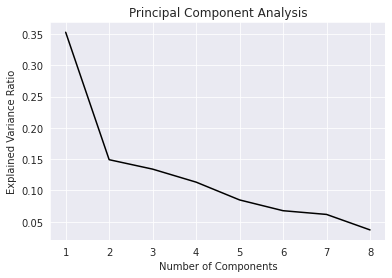

In [60]:
#select values to keep
numeric=['ContentCreatedOn','log10BlockTime','log10BlockNumber','log10MaxSupply','log10MktCapPenalty','log10TotalCoinsMined',
         'log10BlockReward','log10NetHashesPerSecond']

df_cluster = df_cluster[numeric+categorical]

#fit PCA for all numerical columns
pca = PCA()
pca.fit(df_cluster[numeric])

#plot explained variance ratio by number of components
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis')
sns.lineplot(x=np.arange(len(numeric))+1, y=pca.explained_variance_ratio_, color='black')
plt.show()

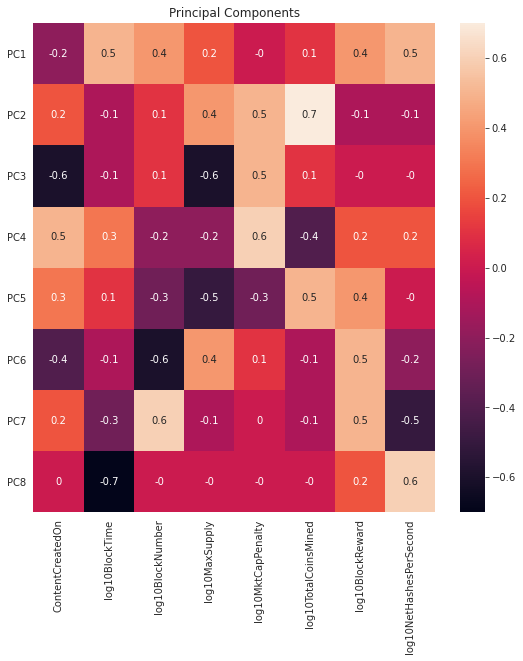

In [61]:
#https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

#plot principal components make-ups
plt.figure(figsize=(9,9))
sns.heatmap(pca.components_.round(1),yticklabels=[ "PC"+str(x) for x in range(1,pca.n_components_+1)],xticklabels=numeric,
            annot=True)

#label plot
plt.title('Principal Components')
plt.yticks(rotation=0) 

plt.show()

In [62]:
#apply pca with desired number of components
components=3
pca=PCA(n_components=components)
pcs = pca.fit_transform(df_cluster[numeric])

df_nopca=df_cluster.copy()

#add pcs to dataframe
df_cluster.drop(columns=numeric,inplace=True)
component_labels=[]

for pc in range(1,components+1):
    df_cluster['PC'+str(pc)]=pcs.transpose()[pc-1]
    component_labels.append('PC'+str(pc))
    
df_cluser = df_cluster[['IsTrading']+component_labels]

df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1993 entries, 42 Coin (42) to BaaSid (BAAS)
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IsTrading   1993 non-null   bool   
 1   Unknown     1993 non-null   uint8  
 2   blockchain  1993 non-null   uint8  
 3   derivative  1993 non-null   uint8  
 4   token       1993 non-null   uint8  
 5   PC1         1993 non-null   float64
 6   PC2         1993 non-null   float64
 7   PC3         1993 non-null   float64
dtypes: bool(1), float64(3), uint8(4)
memory usage: 72.0+ KB


### Clustering

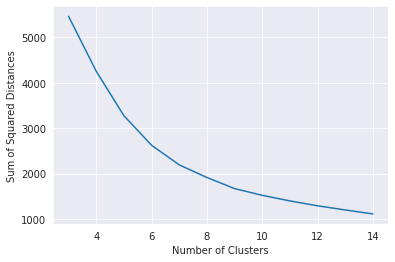

In [63]:
#get data for sum of squared distances for number of clusters
distances=[]
for k in range(3,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans = kmeans.fit(df_cluster)
    distances.append(kmeans.inertia_)

#create plot
plt.plot(range(3,15),distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')

plt.show()

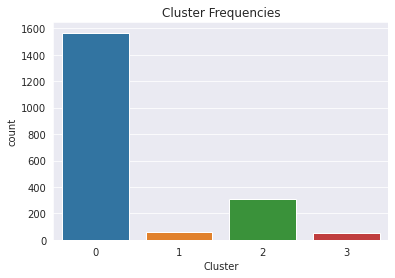

In [64]:
#assign cluster labels
clusters=4
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans = kmeans.fit(df_cluster)
df_cluster['Cluster']=kmeans.labels_
df_nopca['Cluster']=kmeans.labels_

#plot cluster frequencies
sns.countplot(data=df_cluster,x='Cluster',palette=sns.color_palette("tab10")[:clusters])
plt.title('Cluster Frequencies')

plt.show()

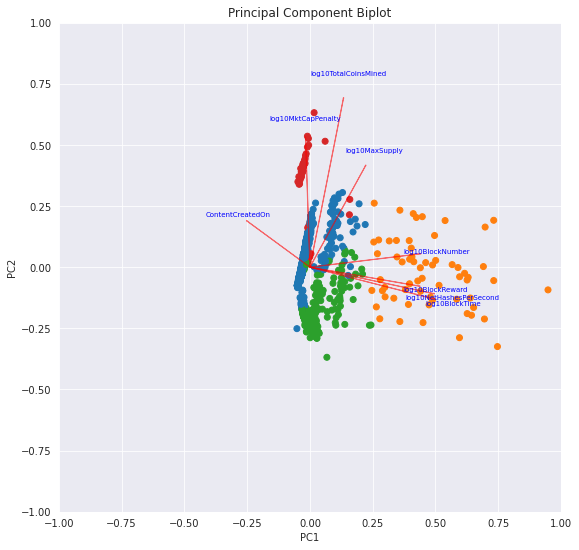

In [65]:
#https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
#function for creating biplot

def myplot(score,coeff,labels=None):
    plt.figure(figsize=(9,9))
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    colormap=np.array(sns.color_palette("tab10")[:clusters])
    categories = df_cluster['Cluster']
    plt.scatter(xs * scalex,ys * scaley, c = colormap[categories],label=df_cluster['Cluster'])

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],alpha = 0.5,color='red')
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, numeric[i], color = 'b', ha = 'center', va = 'center',fontsize='x-small')
            
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title('Principal Component Biplot')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

#Call the function. Use only the 2 PCs.

myplot(df_cluster[['PC1','PC3']],np.transpose(pca.components_[0:2, :]))
plt.show()

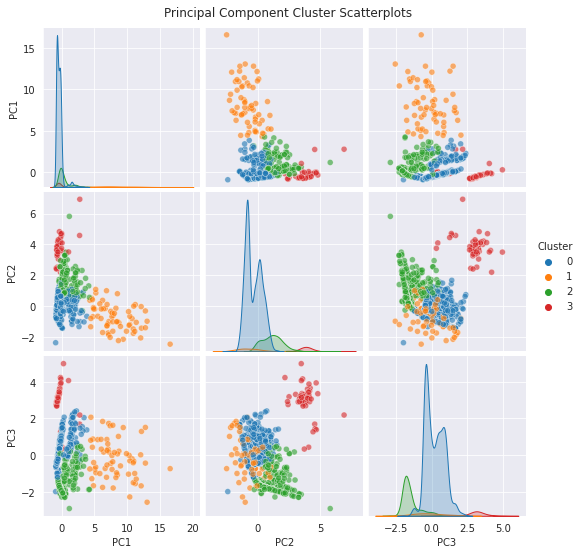

In [66]:
#show scatterplots of PCs against eachothe
g=sns.pairplot(data=df_cluster,vars=component_labels,hue='Cluster',palette=sns.color_palette("tab10")[:clusters],
              plot_kws=dict(alpha=.6))
g.fig.suptitle('Principal Component Cluster Scatterplots',y=1.02)

plt.show()

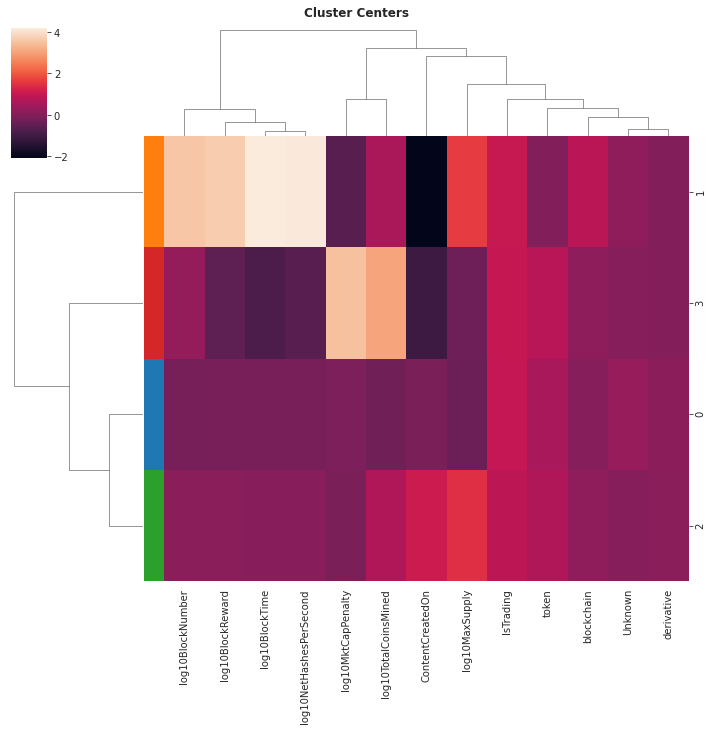

In [67]:
#get data
pcacentroids = pd.DataFrame(kmeans.cluster_centers_,columns=df_cluster.columns[0:pca.n_components_+len(categorical)])
centroids = pd.DataFrame(pca.inverse_transform(pd.DataFrame(kmeans.cluster_centers_).iloc[:,len(categorical):pca.n_components_+len(categorical)]),
                         columns=numeric)

#create plot
g=sns.clustermap(pd.concat([pcacentroids.iloc[:,:len(categorical)],centroids],axis=1),
                 row_colors=sns.color_palette("tab10")[:clusters])
g.fig.suptitle('Cluster Centers',y=1.01,fontweight='bold')

plt.show()

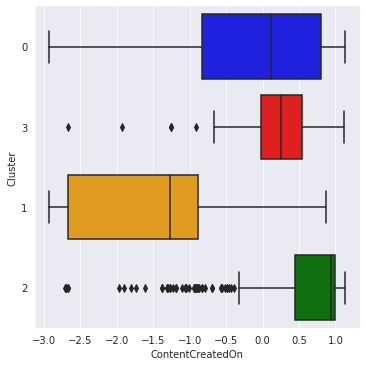

In [161]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='ContentCreatedOn',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

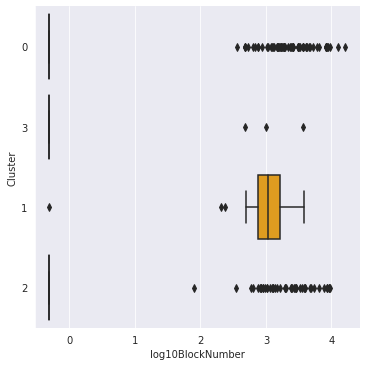

In [184]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10BlockNumber',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

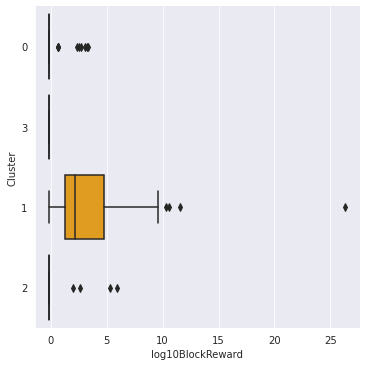

In [185]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10BlockReward',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

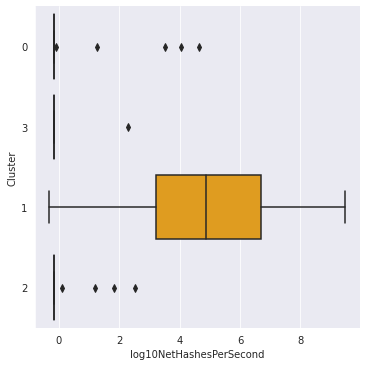

In [186]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10NetHashesPerSecond',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

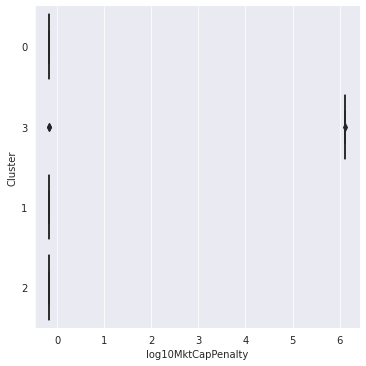

In [187]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10MktCapPenalty',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

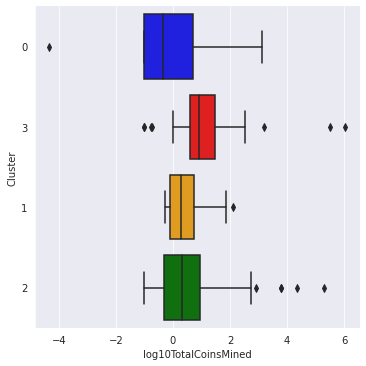

In [188]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10TotalCoinsMined',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

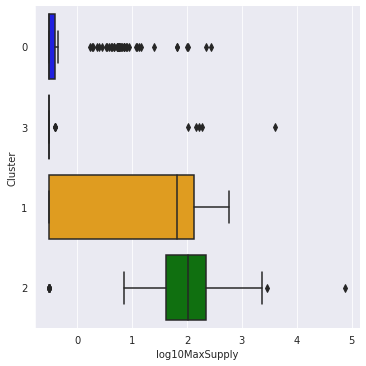

In [189]:
df_nopca['Cluster']=df_nopca['Cluster'].astype(str)
sns.catplot(data=df_nopca, x='log10MaxSupply',y='Cluster',kind='box',palette=['blue','red','orange','green'])
plt.show()

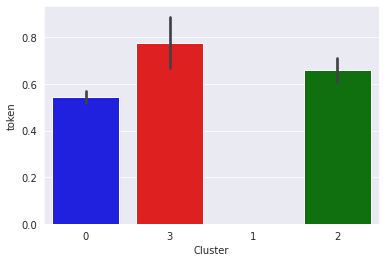

In [170]:
sns.barplot(data=df_nopca,x='Cluster',y='token',palette=['blue','red','orange','green'])
plt.show()

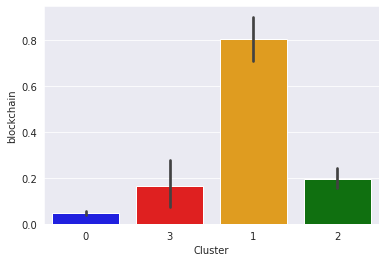

In [171]:
sns.barplot(data=df_nopca,x='Cluster',y='blockchain',palette=['blue','red','orange','green'])
plt.show()

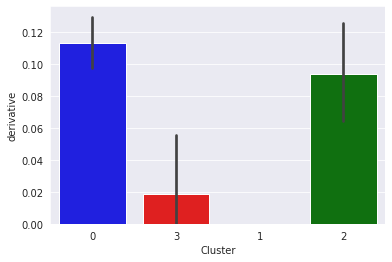

In [172]:
sns.barplot(data=df_nopca,x='Cluster',y='derivative',palette=['blue','red','orange','green'])
plt.show()

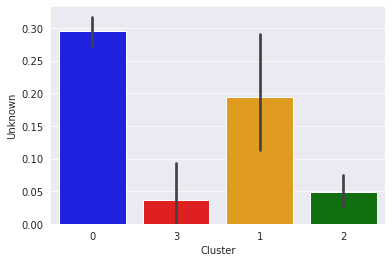

In [173]:
sns.barplot(data=df_nopca,x='Cluster',y='Unknown',palette=['blue','red','orange','green'])
plt.show()

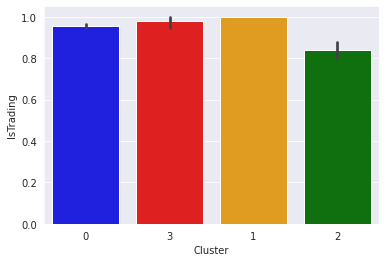

In [190]:
sns.barplot(data=df_nopca,x='Cluster',y='IsTrading',palette=['blue','red','orange','green'])
plt.show()

Cluster 0 - Little Information

Points in this cluster had an overwhelming amount of 0's for most numerical columns of the data. They aren't distiniguished by any particular feature. About half of the points in this cluster are of the platform type token, and almost one-third have their platform type unknown. This column has the highest proportion of points with platform types unknown by a significant margin. These data points were created over a large time frame, but centered more towards the later half of the ContentCreatedOn dates. This is the largest cluster by far.

Cluster 1 - Well Distributed Features

Most clusters have poorly distributed numerical features - the majority of points have values of 0's, with only a few outliers having non-zero values. What sets cluster 1 apart, is that for most numerical features, data points are not centered at 0, and take on a wide range of values. Interestingly, almost all points in this cluster of the platform type blockchain (about 80%), while the rest have an unknown type. The points in this cluster were also created on a wide time frame, but centered towards the first half of the ContentCreatedOn dates, unlike cluster 0.

Cluster 2 - Modern

Points in this cluster are hevaily clumped together in high values of ContentCreatedOn. They are also distinguished by hvaing high max supplies. The cluster also has the smallest proportion of data points that are trading.

Cluster 3 - Large Market Capitalization Penalty

The points in this cluster are most distinguishable by their non-zero values for market capitalization penalty. They also have high values for total coins mined, which makes sense, as market capitalization is the number of coins mined multiplied by the price. 